In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
import numpy as np
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error

In [0]:
df = pd.read_csv("dengue_features_train.csv")
lables = pd.read_csv("dengue_labels_train.csv")

In [0]:
data = pd.merge(df, lables, on = ['city', 'year', 'weekofyear'])

In [5]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [0]:
sj = data[data['city'] == 'sj']
sj = sj.drop('city', axis=1)

iq = data[data['city'] == 'iq']
iq = iq.drop('city', axis=1)

In [0]:
sj['week_start_date'] = pd.to_datetime(sj['week_start_date'])

iq['week_start_date'] = pd.to_datetime(iq['week_start_date'])

In [0]:
sj = sj[['week_start_date', 'total_cases']]
sj['ds'] = sj['week_start_date']
sj['y'] = sj['total_cases']
sj.drop(['week_start_date', 'total_cases'], axis=1, inplace=True)

In [9]:
sj.head()

,ds,y
0,1990-04-30,4
1,1990-05-07,5
2,1990-05-14,4
3,1990-05-21,3
4,1990-05-28,6


In [0]:
train_sj = sj[:800]
test_sj = sj[800:]

In [11]:
m = Prophet()
m.fit(train_sj)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_train = m.predict(pd.DataFrame(train_sj['ds']))

In [13]:
forecast_test = m.predict(pd.DataFrame(test_sj['ds']))
forecast_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
131,2008-03-25,-13.242139,-77.360766,48.777425
132,2008-04-01,-14.117578,-75.288702,50.156087
133,2008-04-08,-14.324032,-74.259103,46.402708
134,2008-04-15,-14.673305,-72.817891,44.244661
135,2008-04-22,-15.411755,-76.686521,44.854343


In [14]:
mean_absolute_error(test_sj['y'], forecast_test['yhat'])

19.43617693033865

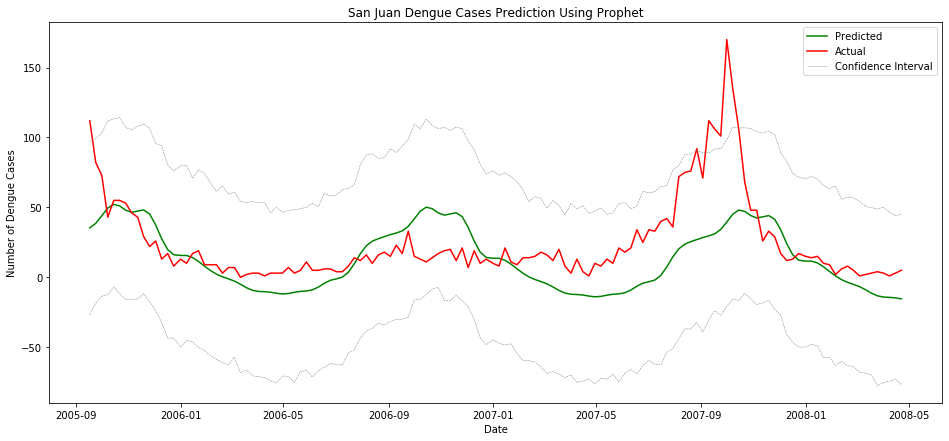

In [15]:
fig = plt.figure(figsize=(16,7))
#plt.plot(forecast_train['ds'], forecast_train['yhat'], label = 'Predicted train')
#plt.plot(train_sj['ds'], train_sj['y'], label = 'Actual train')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label = 'Predicted', color = 'green')
plt.plot(test_sj['ds'], test_sj['y'], label = 'Actual', color = 'red')
plt.plot(forecast_test['ds'], forecast_test['yhat_lower'], '--', label = 'Confidence Interval', color = 'grey', linewidth = 0.5)
plt.plot(forecast_test['ds'], forecast_test['yhat_upper'], '--', color = 'grey', linewidth = 0.5)
plt.xlabel("Date")
plt.ylabel("Number of Dengue Cases")
plt.title("San Juan Dengue Cases Prediction Using Prophet")
plt.legend()
plt.savefig("San Juan dengue cases prediction using Prophet.png")

In [0]:
iq = iq[['week_start_date', 'total_cases']]
iq['ds'] = iq['week_start_date']
iq['y'] = iq['total_cases']
iq.drop(['week_start_date', 'total_cases'], axis=1, inplace=True)

In [0]:
train_iq = iq[:400]
test_iq = iq[400:]

In [18]:
m_iq = Prophet()
m_iq.fit(train_iq)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_train_iq = m_iq.predict(pd.DataFrame(train_iq['ds']))

In [0]:
forecast_test_iq = m_iq.predict(pd.DataFrame(test_iq['ds']))

In [21]:
mean_absolute_error(test_iq['y'], forecast_test_iq['yhat'])

7.9295627731798275

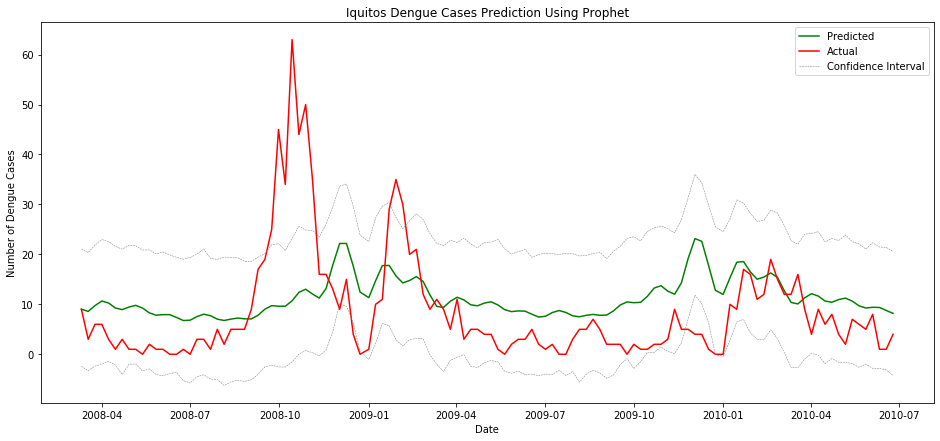

In [22]:
fig = plt.figure(figsize=(16,7))
#plt.plot(forecast_train_iq['ds'], forecast_train_iq['yhat'], label = 'Predicted train')
#plt.plot(train_iq['ds'], train_iq['y'], label = 'Actual train')
plt.plot(forecast_test_iq['ds'], forecast_test_iq['yhat'], label = 'Predicted', color = 'green')
plt.plot(test_iq['ds'], test_iq['y'], label = 'Actual', color = 'red')
plt.plot(forecast_test_iq['ds'], forecast_test_iq['yhat_lower'], '--', label = 'Confidence Interval', color = 'grey', linewidth = 0.5)
plt.plot(forecast_test_iq['ds'], forecast_test_iq['yhat_upper'], '--', color = 'grey', linewidth = 0.5)
plt.xlabel("Date")
plt.ylabel("Number of Dengue Cases")
plt.title("Iquitos Dengue Cases Prediction Using Prophet")
plt.legend()
plt.savefig("Iquitos dengue cases prediction using Prophet.png")